   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.2 MB/s eta 0:00:00
Using Colab cache for faster access to the 'mnist-dataset' dataset.
Dataset downloaded to: /kaggle/input/mnist-dataset
Training set: (60000, 28, 28, 1) (60000,)
Testing set: (10000, 28, 28, 1) (10000,)
Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
422/422 - 37s - 89ms/step - accuracy: 0.9014 - loss: 0.3203 - val_accuracy: 0.9815 - val_loss: 0.0616
Epoch 2/5
422/422 - 36s - 85ms/step - accuracy: 0.9712 - loss: 0.0976 - val_accuracy: 0.9848 - val_loss: 0.0465
Epoch 3/5
422/422 - 36s - 86ms/step - accuracy: 0.9791 - loss: 0.0712 - val_accuracy: 0.9892 - val_loss: 0.0363
Epoch 4/5
422/422 - 37s - 87ms/step - accuracy: 0.9832 - loss: 0.0556 - val_accuracy: 0.9862 - val_loss: 0.0439
Epoch 5/5
422/422 - 40s - 95ms/step - accuracy: 0.9846 - loss: 0.0496 - val_accuracy: 0.9897 - val_loss: 0.0334
✅ Test Accuracy: 98.97%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9928    0.9888    0.9908       980
           1     0.9938    0.9938    0.9938      1135
           2     0.9875    0.9932    0.9903      1032
           3     0.9892    0.9941    0.9916      1010
           4     0.9949    0.9898    0.9923       982
           5     0.9887 

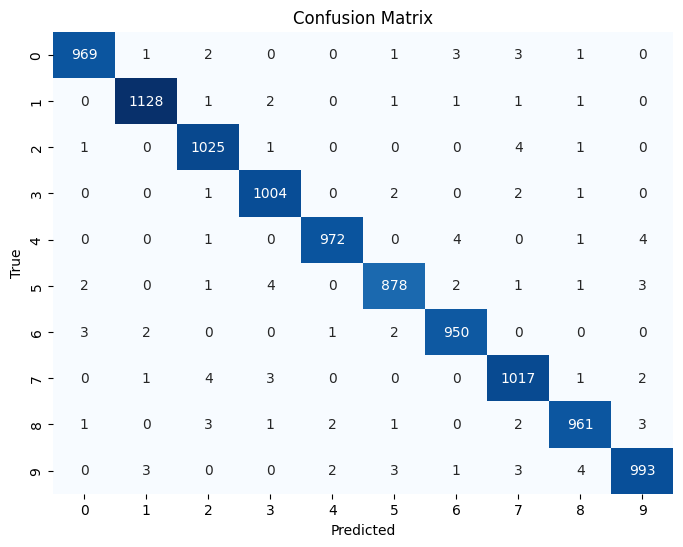

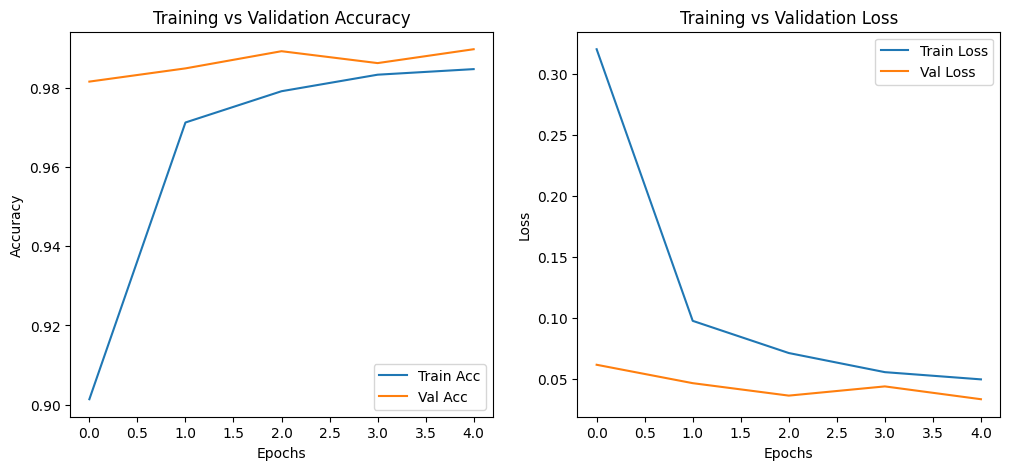

In [1]:
# ===============================
# STEP 0: Install dependencies
# ===============================
!pip install -q kagglehub
!pip install -q resampy soundfile librosa==0.10.1 seaborn tensorflow matplotlib pandas scikit-learn

# ===============================
# STEP 1: Import MNIST via KaggleHub
# ===============================
import kagglehub

# Download dataset
dataset_path = kagglehub.dataset_download("hojjatk/mnist-dataset")
print("Dataset downloaded to:", dataset_path)

# ===============================
# STEP 2: Import Libraries
# ===============================
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import struct

# ===============================
# STEP 3: Helper functions to read IDX
# ===============================
def load_idx_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        data = np.frombuffer(f.read(), dtype=np.uint8)
        data = data.reshape(num, rows, cols, 1)
        return data

def load_idx_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data


# ===============================
# STEP 4: Load Dataset (IDX files)
# ===============================
X_train = load_idx_images(os.path.join(dataset_path, "train-images.idx3-ubyte"))
y_train = load_idx_labels(os.path.join(dataset_path, "train-labels.idx1-ubyte"))

X_test = load_idx_images(os.path.join(dataset_path, "t10k-images.idx3-ubyte"))
y_test = load_idx_labels(os.path.join(dataset_path, "t10k-labels.idx1-ubyte"))

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


# Normalize
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# One-hot encode
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat  = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# ===============================
# STEP 5: Build CNN Model
# ===============================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ===============================
# STEP 6: Train Model
# ===============================
history = model.fit(X_train, y_train_cat,
                    validation_split=0.1,
                    epochs=5,
                    batch_size=128,
                    verbose=2)

# ===============================
# STEP 7: Evaluate Model
# ===============================
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")

# ===============================
# STEP 8: Metrics (Precision, Recall, F1)
# ===============================
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# ===============================
# STEP 9: Confusion Matrix
# ===============================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ===============================
# STEP 10: Training vs Validation Curves
# ===============================
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [ ]:
import os

# Show dataset structure
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")


mnist-dataset/
    train-images.idx3-ubyte
    t10k-labels.idx1-ubyte
    t10k-images.idx3-ubyte
    train-labels.idx1-ubyte
    t10k-labels-idx1-ubyte/
        t10k-labels-idx1-ubyte
    t10k-images-idx3-ubyte/
        t10k-images-idx3-ubyte
    train-labels-idx1-ubyte/
        train-labels-idx1-ubyte
    train-images-idx3-ubyte/
        train-images-idx3-ubyte
